In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

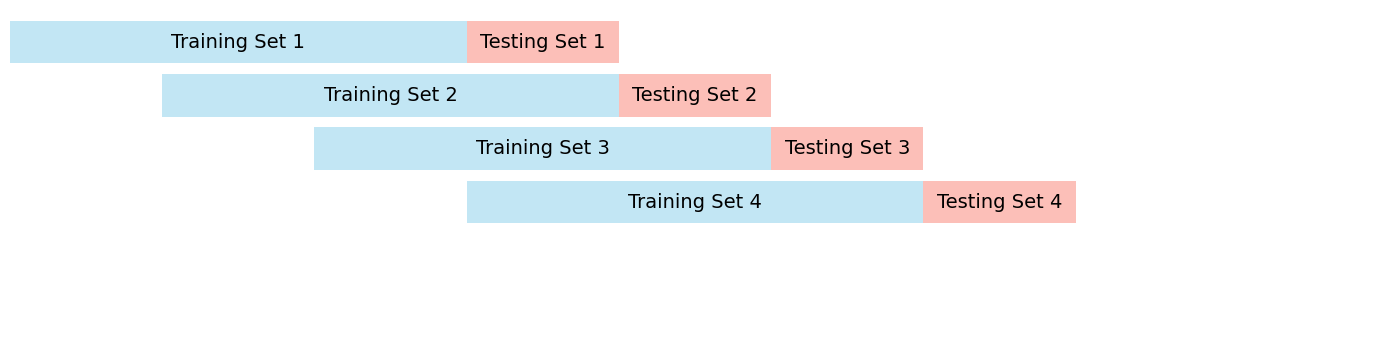

In [2]:
fig, ax = plt.subplots(figsize=(14, 3.5))

# Set limits
ax.set_xlim(0, 2250)
ax.set_ylim(-0.5, 2.5)
ax.set_yticks([])
ax.set_xticklabels([])  # remove x number labels

# Make X and Y axis not visible
ax.axis('off')

# Define parameters
start_positions = [0, 250, 500, 750]  # 4 study periods
train_period = 750
test_period = 250

# Define colors
train_color = "skyblue"
test_color = "salmon"

# Draw segments
for i, start in enumerate(start_positions):
    train_rect = patches.Rectangle((start, 2-i*0.5), train_period, 0.4, facecolor=train_color, alpha=0.5)  # height of the boxes doubled and adjusted position
    test_rect = patches.Rectangle((start+train_period, 2-i*0.5), test_period, 0.4, facecolor=test_color, alpha=0.5)  # height of the boxes doubled and adjusted position
    ax.add_patch(train_rect)
    ax.add_patch(test_rect)

    # Add text in all boxes and double the size of labels in boxes
    ax.text(start + train_period/2, 2-i*0.5+0.2, f"Training Set {i+1}", ha='center', va='center', color='black', fontsize=14)
    ax.text(start + train_period + test_period/2, 2-i*0.5+0.2, f"Testing Set {i+1}", ha='center', va='center', color='black', fontsize=14)

plt.tight_layout()

#plt.savefig('chart.png')

plt.show()




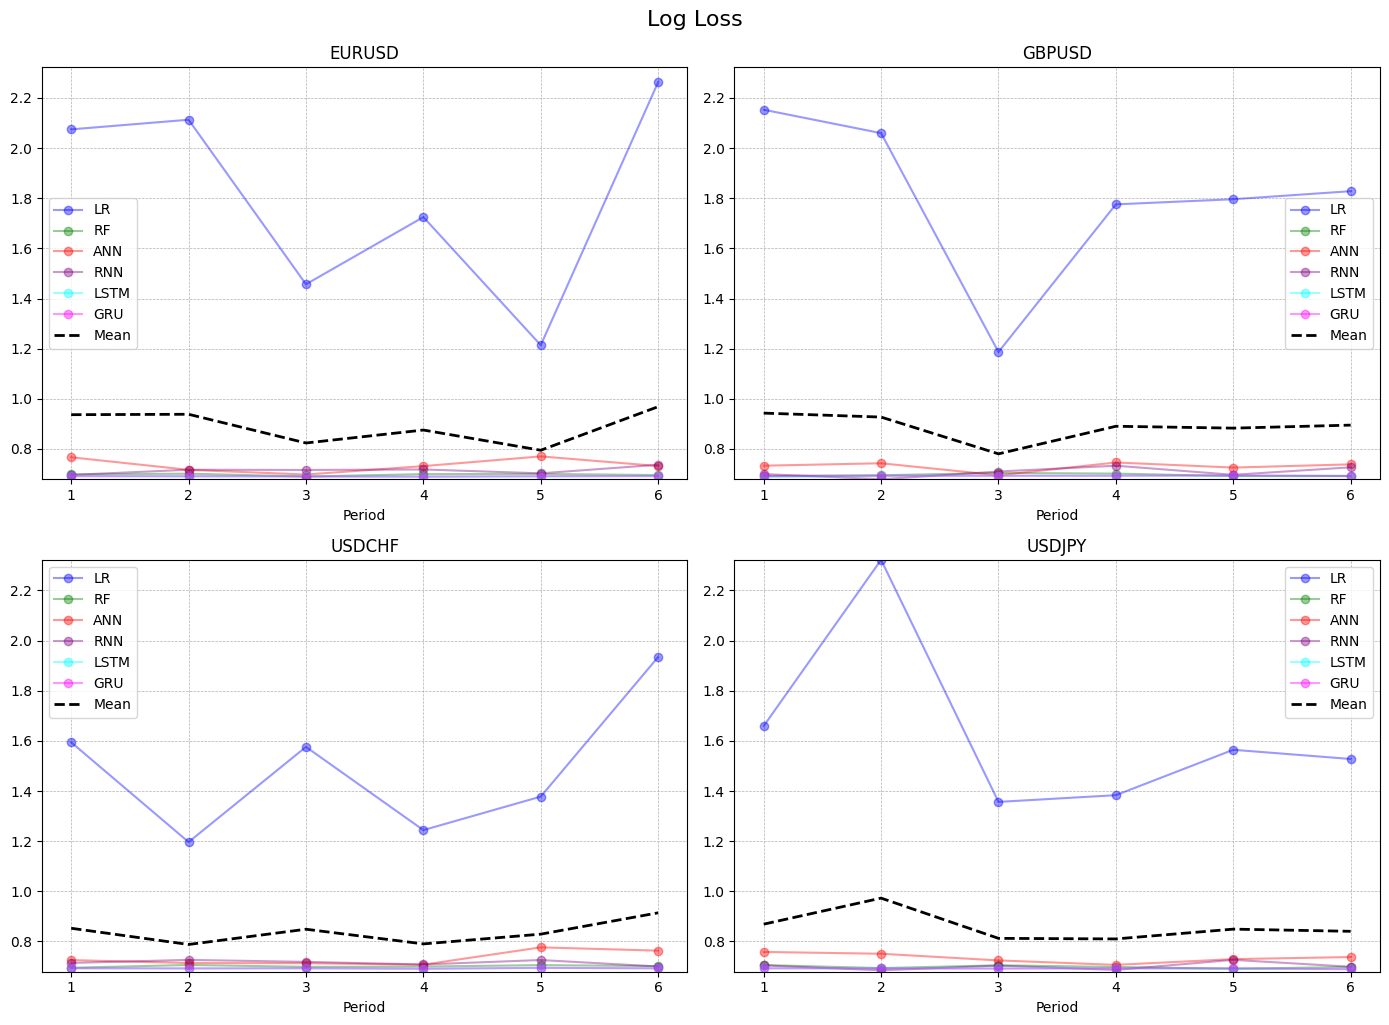

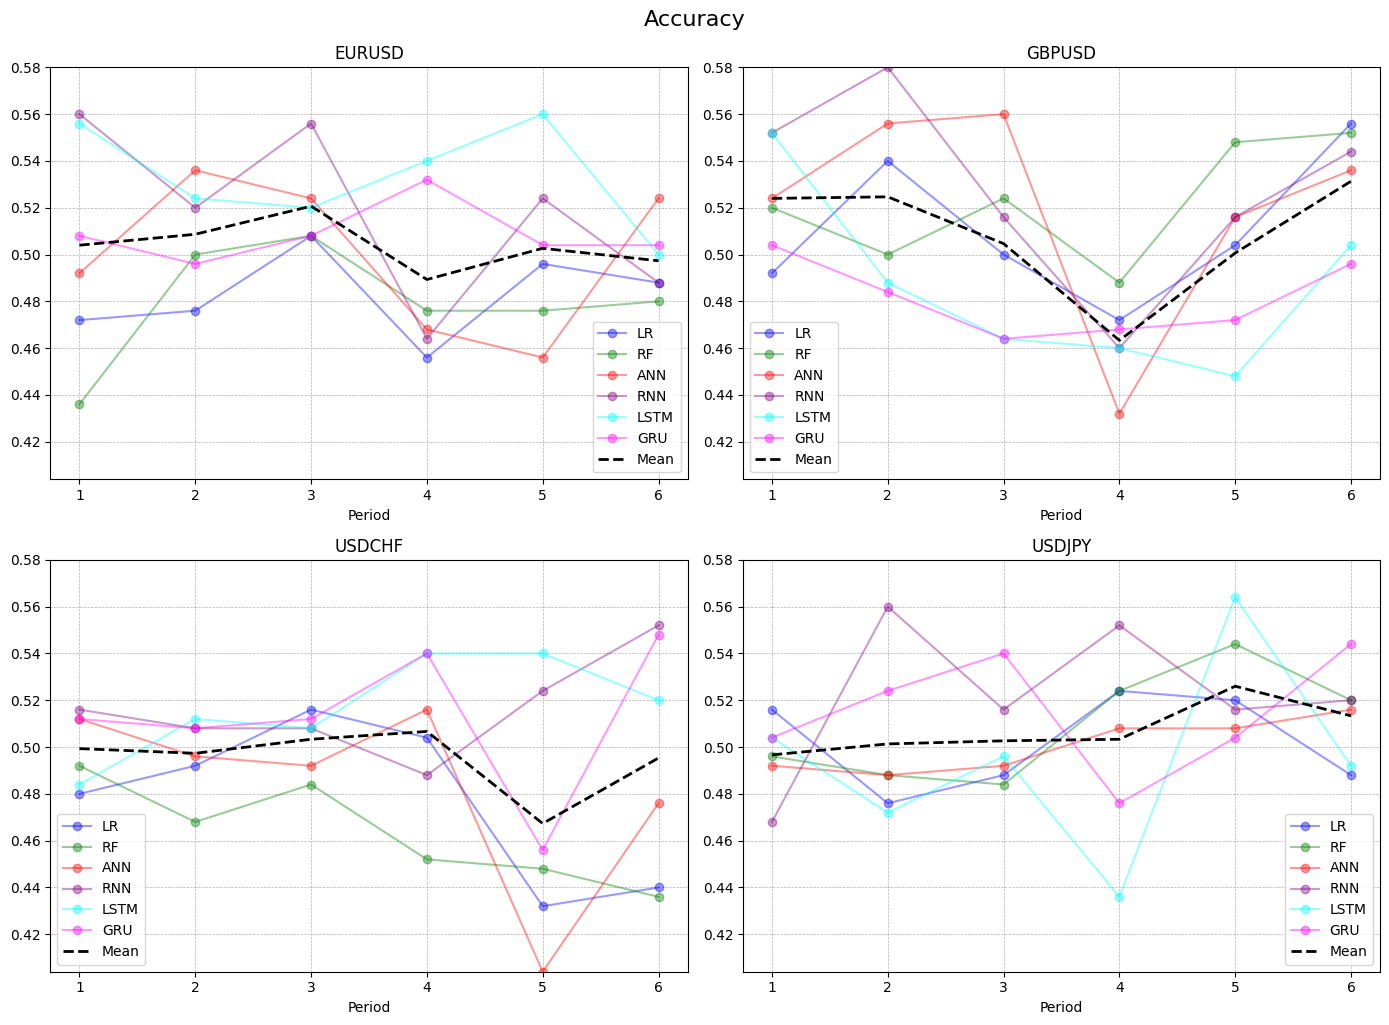

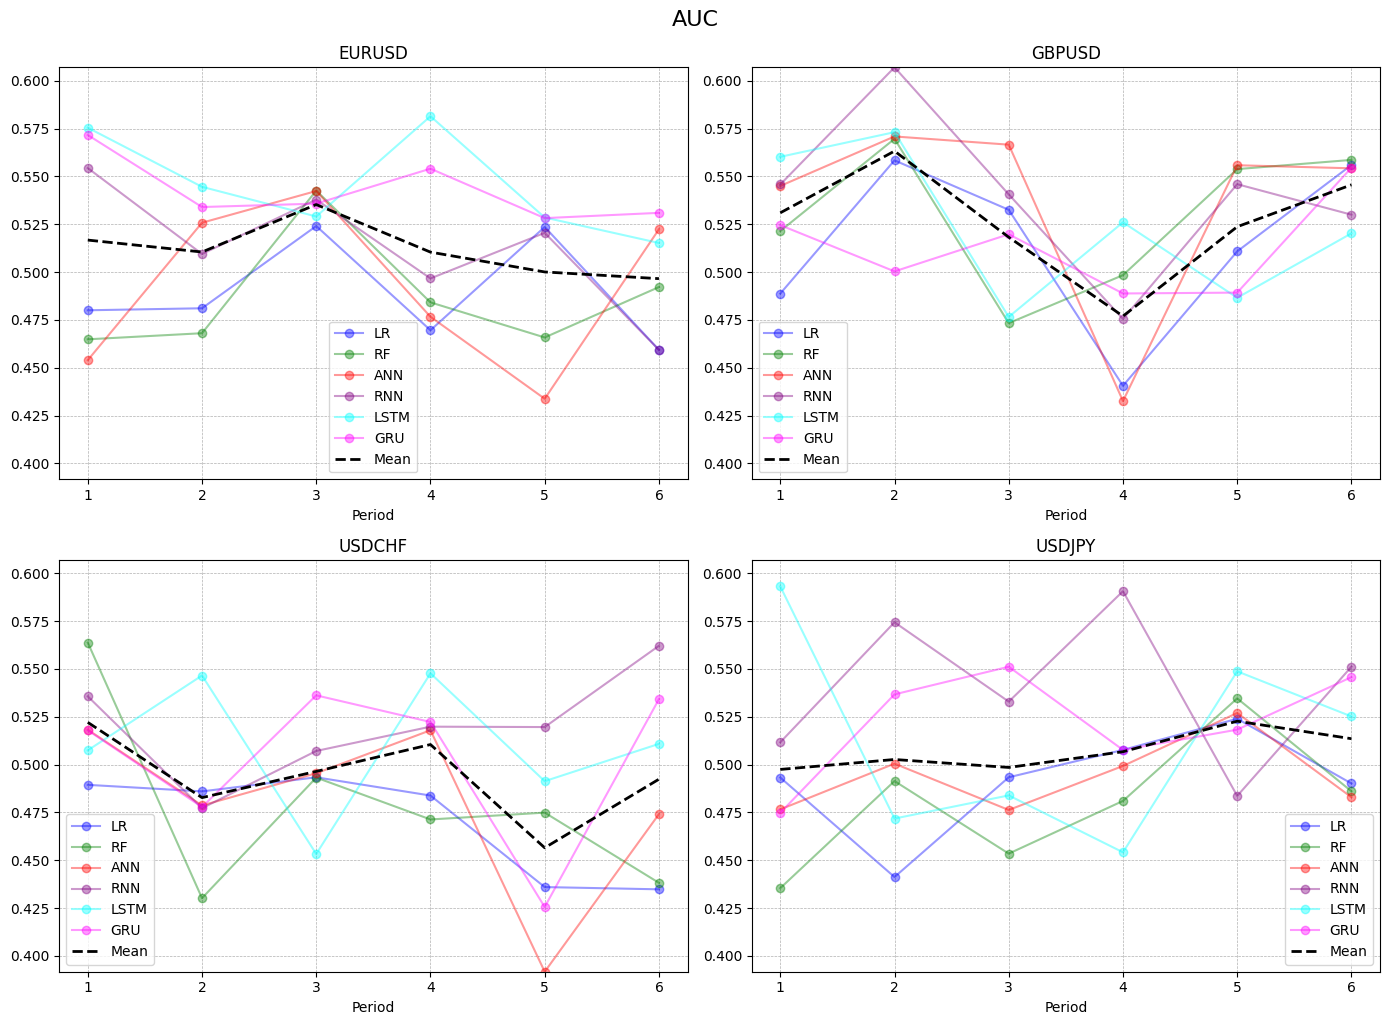

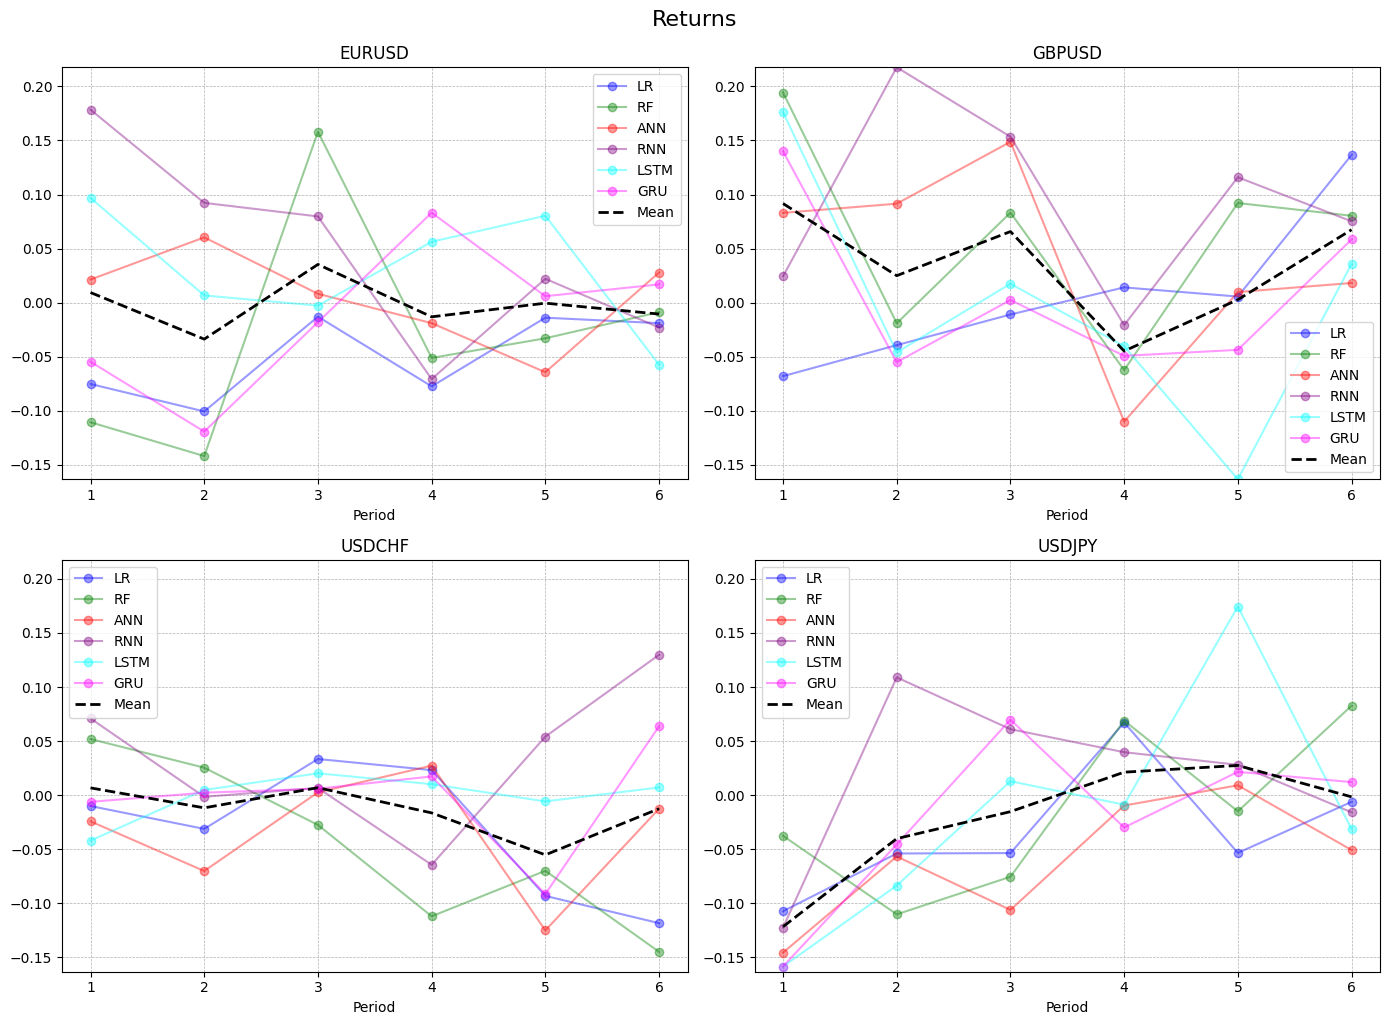

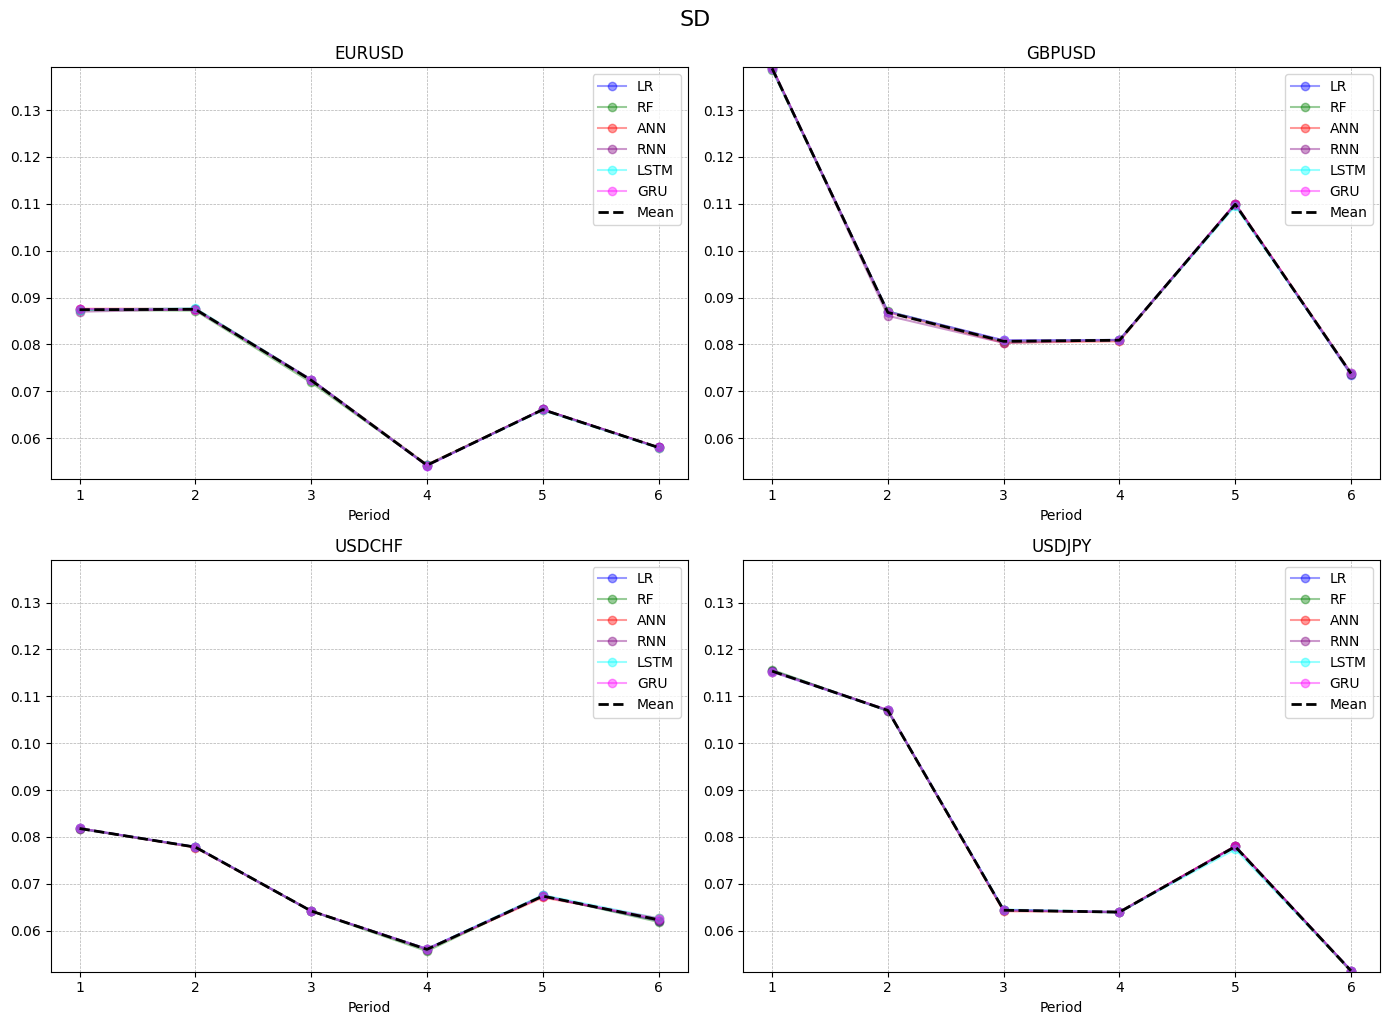

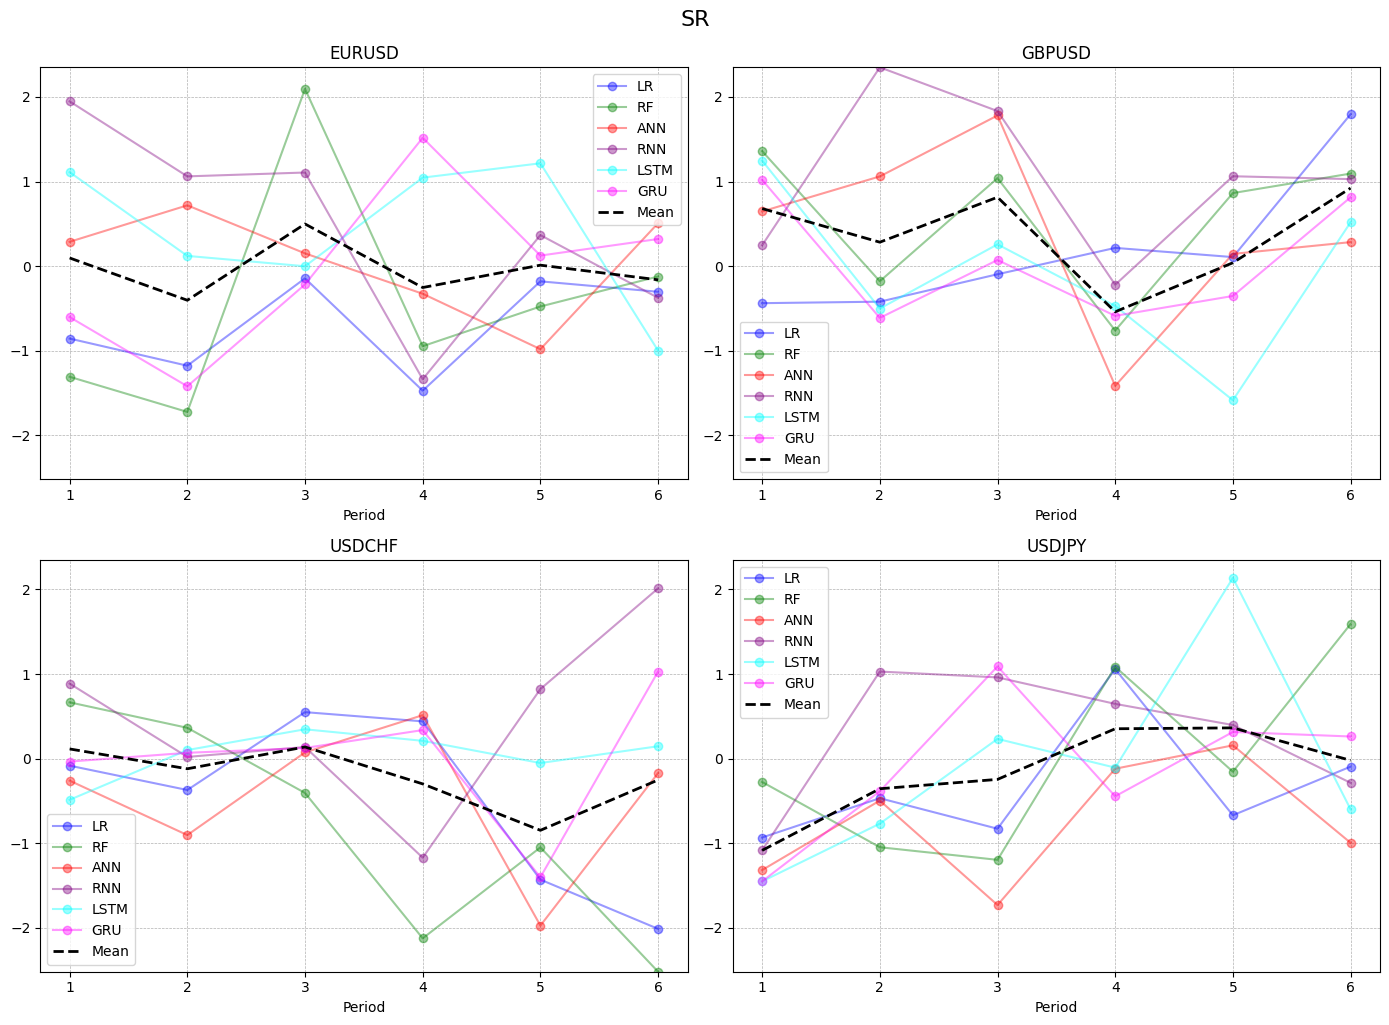

In [14]:
import sys
import os

sys.path.insert(0, os.path.abspath('../..'))

from src.config import REPORTS_DIR

import pandas as pd
import matplotlib.pyplot as plt

# Define the directory and selected models and currency files
selected_models = ["LR", "RF", "ANN", "RNN", "LSTM", "GRU"]
currency_files = ["EURUSD.csv", "GBPUSD.csv", "USDCHF.csv", "USDJPY.csv"]

# Load the data
model_data = {}
for model in selected_models:
    model_data[model] = {}
    for currency_file in currency_files:
        file_path = os.path.join(REPORTS_DIR, model, currency_file)
        if os.path.exists(file_path):
            model_data[model][currency_file.replace(".csv", "")] = pd.read_csv(file_path)

def get_global_y_axis_limits_updated(data, metric):
    """
    Determine the global minimum and maximum values for a given metric across all models and currency pairs.
    """
    all_values = []
    for currency_file in currency_files:
        currency_name = currency_file.replace(".csv", "")
        for model in selected_models:
            if currency_name in data[model]:
                all_values.extend(data[model][currency_name][metric].dropna().values)
    return min(all_values), max(all_values)

def plot_metrics_with_all_models_highlighted_mean_updated(data, metric):
    """
    Create a 2x2 subplot layout for a given metric across periods 1 to 6 for all currency pairs.
    Each subplot will have lines for all models for direct comparison, and a prominently displayed mean line.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    distinct_colors = ['blue', 'green', 'red', 'purple', 'cyan', 'magenta']
    y_min, y_max = get_global_y_axis_limits_updated(data, metric)
    
    for idx, currency_file in enumerate(currency_files):
        currency_name = currency_file.replace(".csv", "")
        
        # Calculate mean for the metric across all models for this currency
        mean_values = []
        for period_label in ["Period " + str(i) for i in range(1, 7)]:
            period_values = []
            for model in selected_models:
                model_df = data[model][currency_name]
                rows_of_interest = model_df[model_df['Unnamed: 0'] == period_label]
                if not rows_of_interest.empty:
                    period_values.append(rows_of_interest[metric].values[0])
            mean_values.append(sum(period_values) / len(period_values))
        
        # Plot model values with reduced opacity
        for model, color in zip(selected_models, distinct_colors):
            metric_values = []
            for period_label in ["Period " + str(i) for i in range(1, 7)]:
                if currency_name in data[model]:
                    model_df = data[model][currency_name]
                    rows_of_interest = model_df[model_df['Unnamed: 0'] == period_label]
                    if not rows_of_interest.empty:
                        value = rows_of_interest[metric].values[0]
                        metric_values.append(value)
                    else:
                        metric_values.append(None)
            axes[idx].plot(["1", "2", "3", "4", "5", "6"], metric_values, marker='o', label=model, color=color, alpha=0.4)
        
        # Plot mean line with increased thickness
        axes[idx].plot(["1", "2", "3", "4", "5", "6"], mean_values, linestyle='--', color='black', label='Mean', linewidth=2)
        
        axes[idx].set_title(currency_name)
        axes[idx].set_xlabel('Period')
        axes[idx].set_ylim(y_min, y_max)
        axes[idx].grid(True, which='both', linestyle='--', linewidth=0.5)
        axes[idx].legend()
    
    plt.tight_layout()
    plt.suptitle(metric, fontsize=16, y=1.02)
    plt.show()

# Generate the updated plots with all models for each metric across periods 1 to 6 for all currency pairs
#metrics = list(model_data[selected_models[0]][currency_files[0].replace(".csv", "")].columns)[1:]
metrics = ['Log Loss', 'Accuracy', 'AUC', 'Returns', 'SD', 'SR']

for metric in metrics:
    plot_metrics_with_all_models_highlighted_mean_updated(model_data, metric)



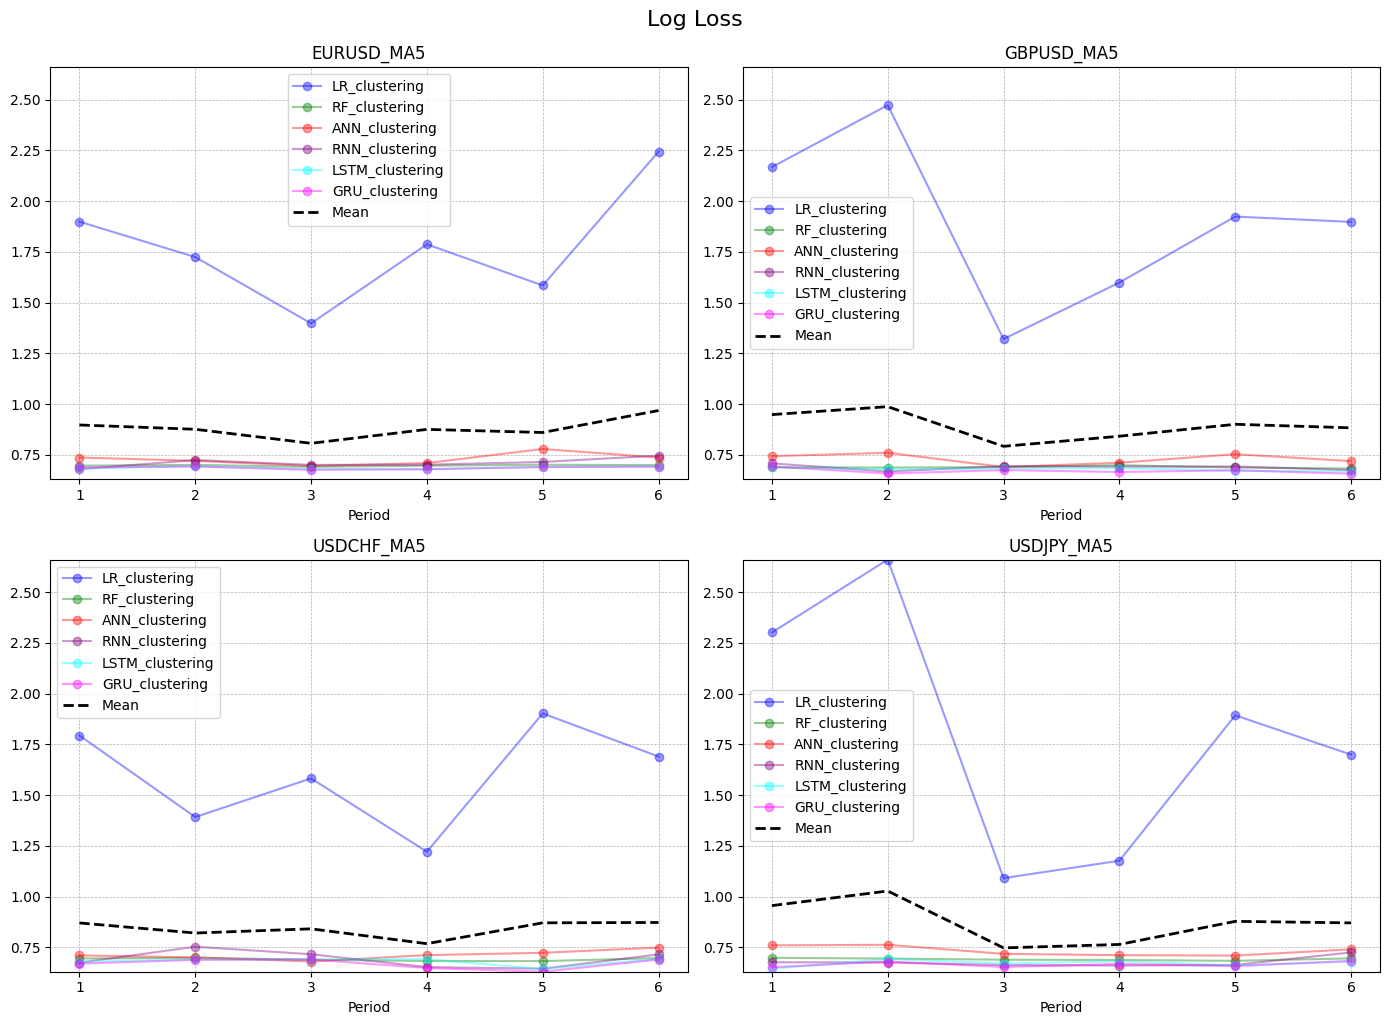

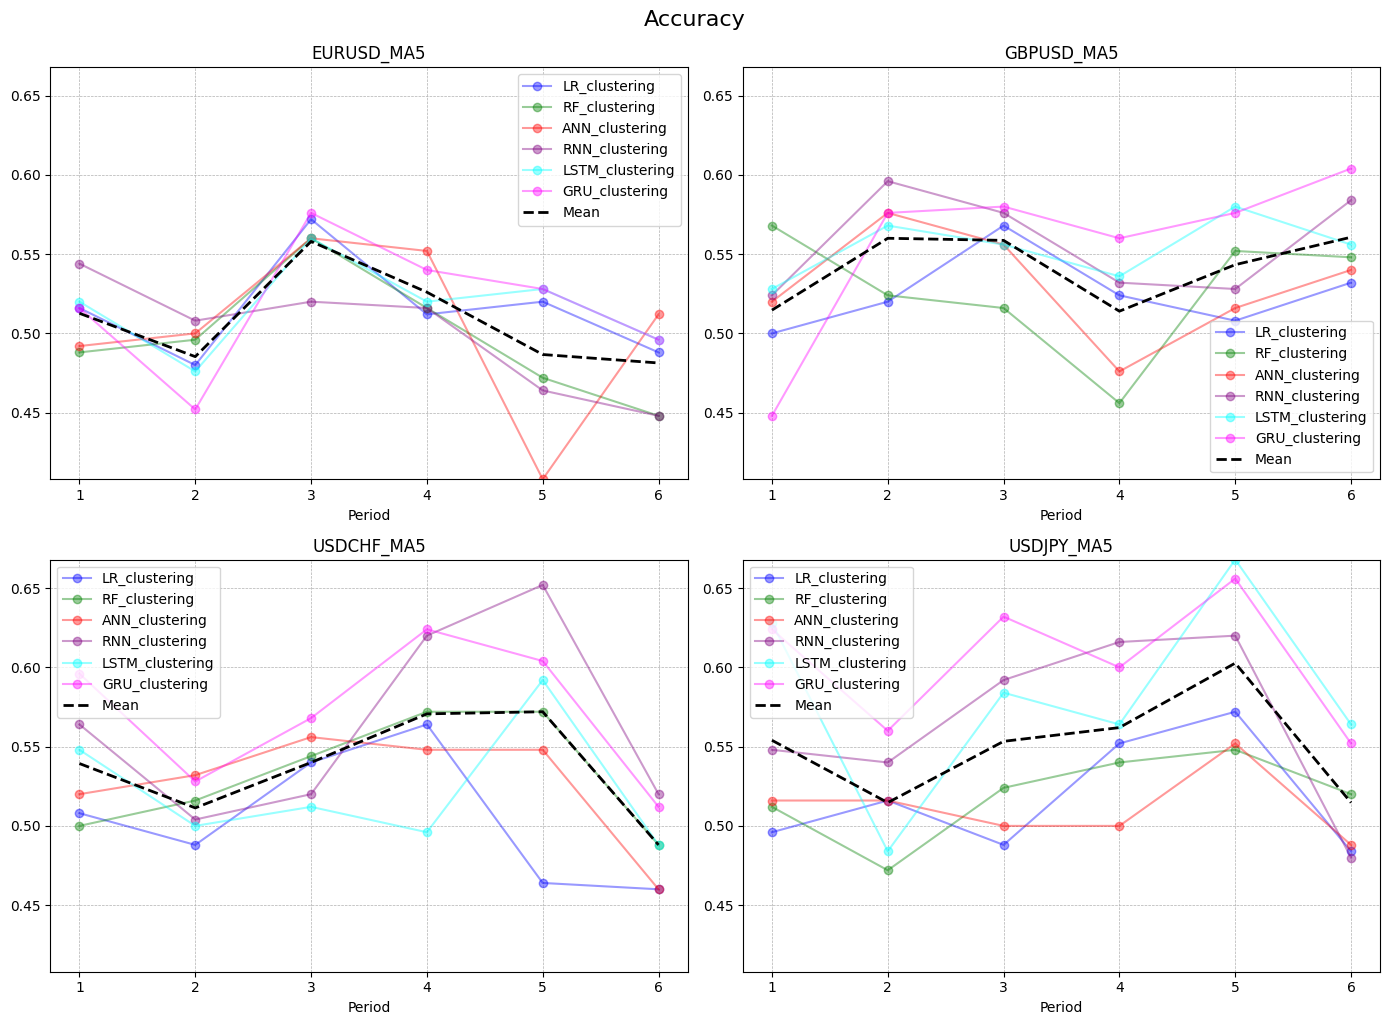

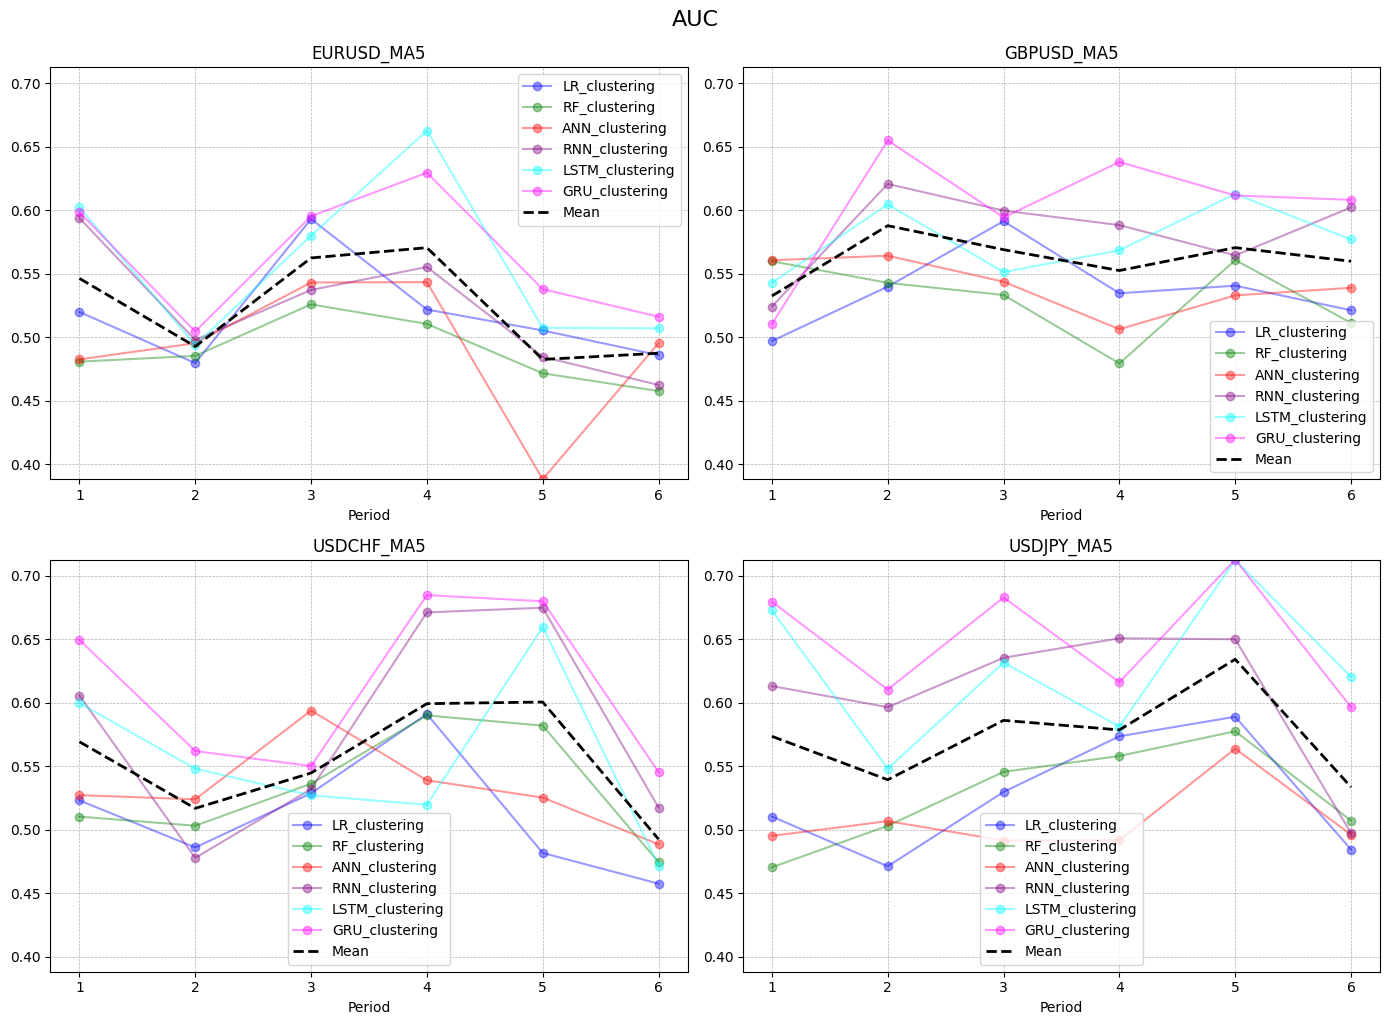

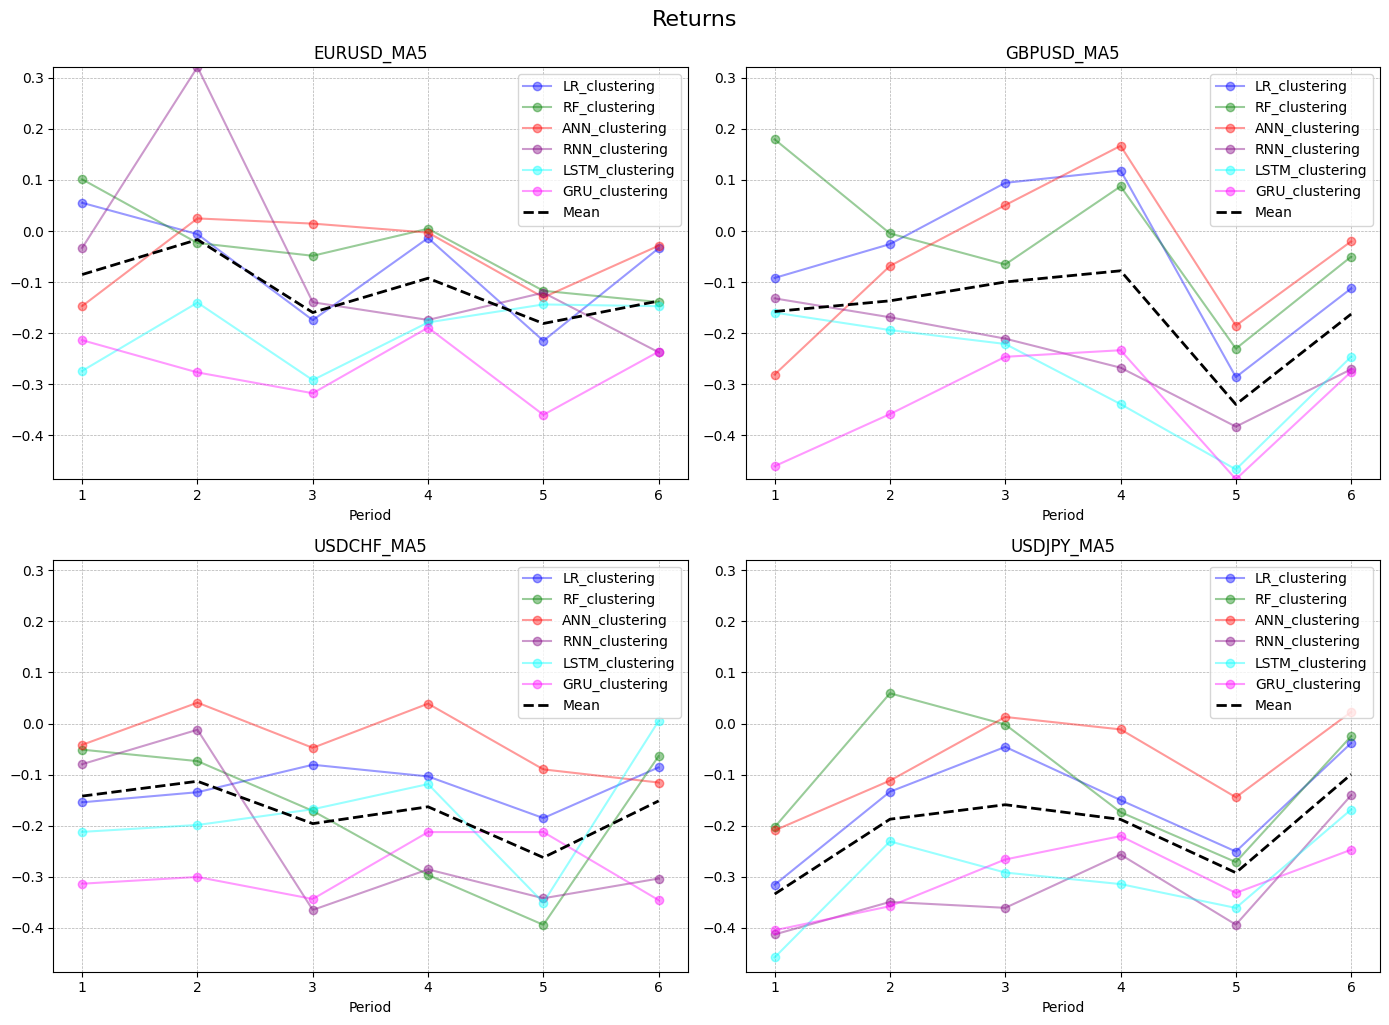

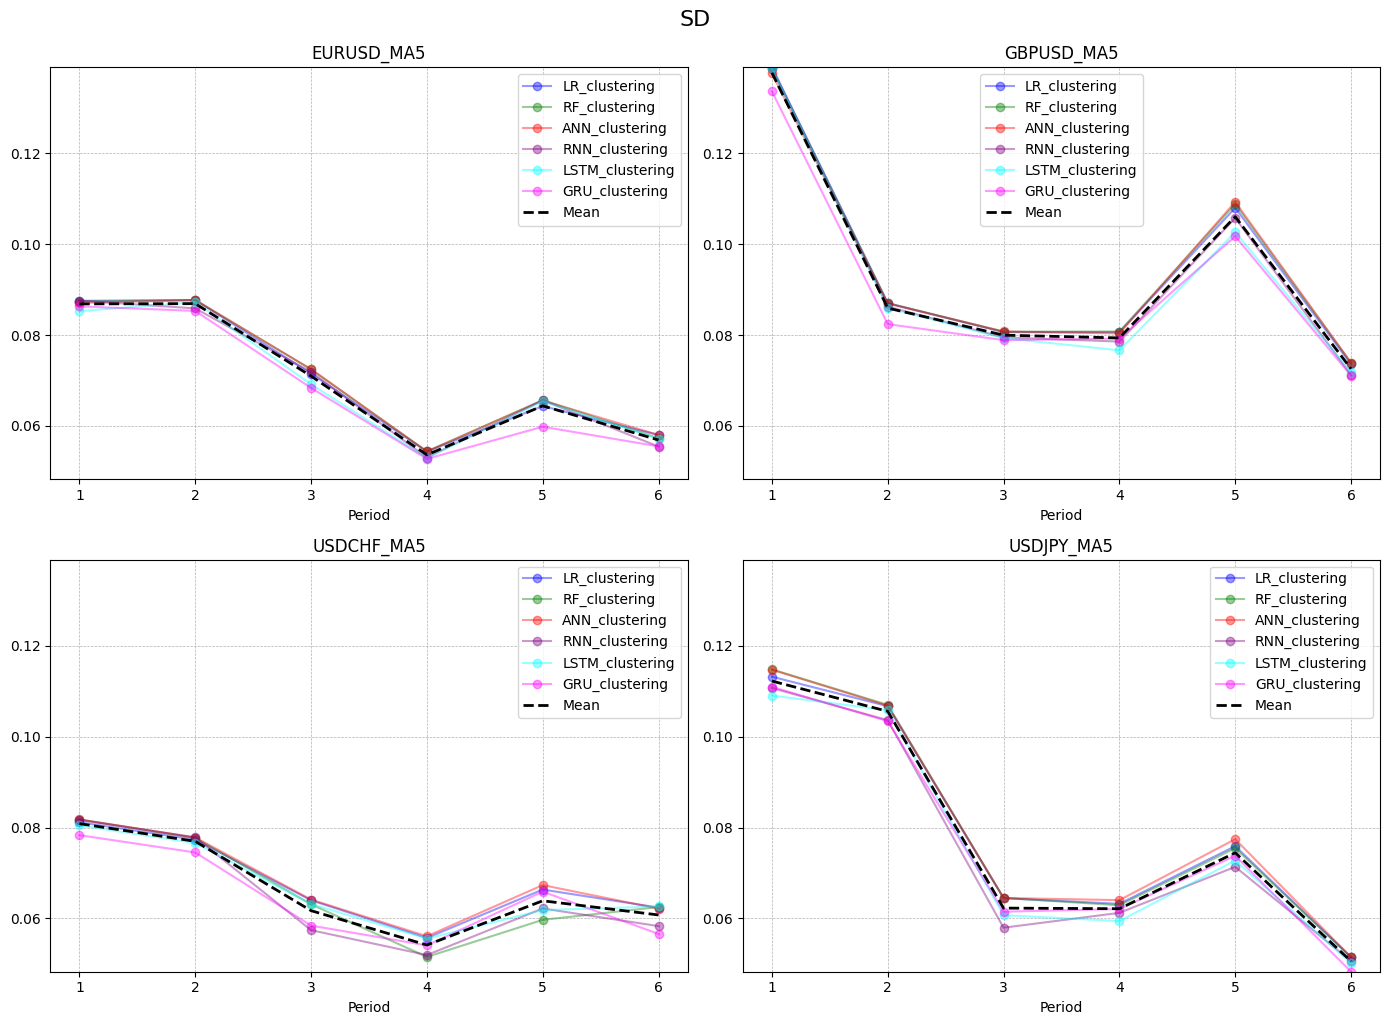

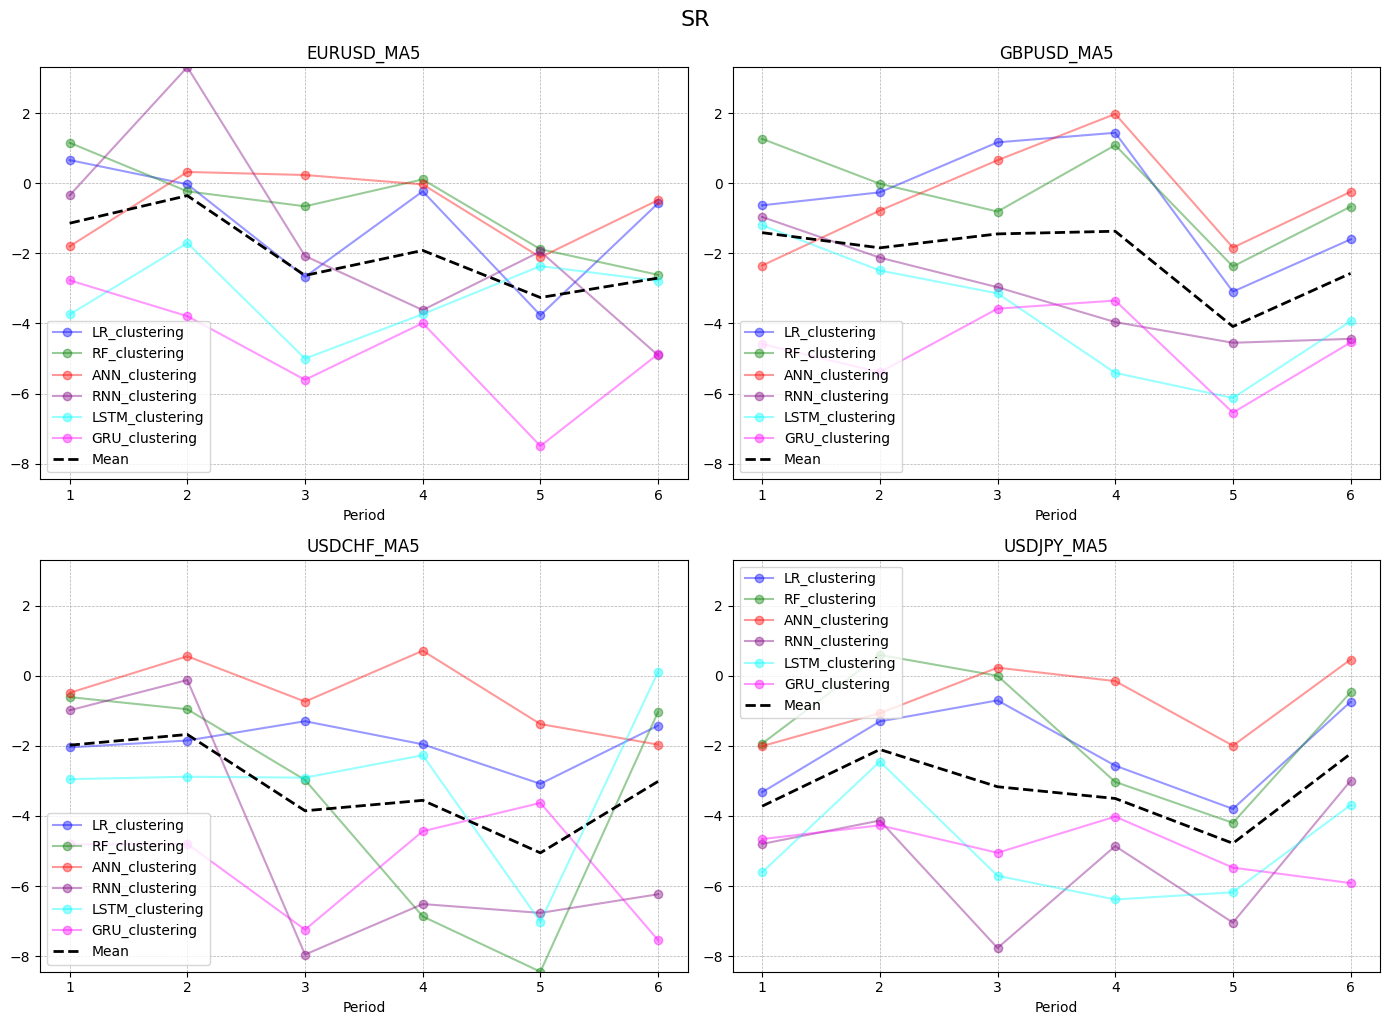

In [15]:
selected_models = ["LR_clustering", "RF_clustering", "ANN_clustering", "RNN_clustering", "LSTM_clustering", "GRU_clustering"]
currency_files = ["EURUSD_MA5.csv", "GBPUSD_MA5.csv", "USDCHF_MA5.csv", "USDJPY_MA5.csv"]

# Load the data
model_data = {}
for model in selected_models:
    model_data[model] = {}
    for currency_file in currency_files:
        file_path = os.path.join(REPORTS_DIR, model, currency_file)
        if os.path.exists(file_path):
            model_data[model][currency_file.replace(".csv", "")] = pd.read_csv(file_path)

for metric in metrics:
    plot_metrics_with_all_models_highlighted_mean_updated(model_data, metric)

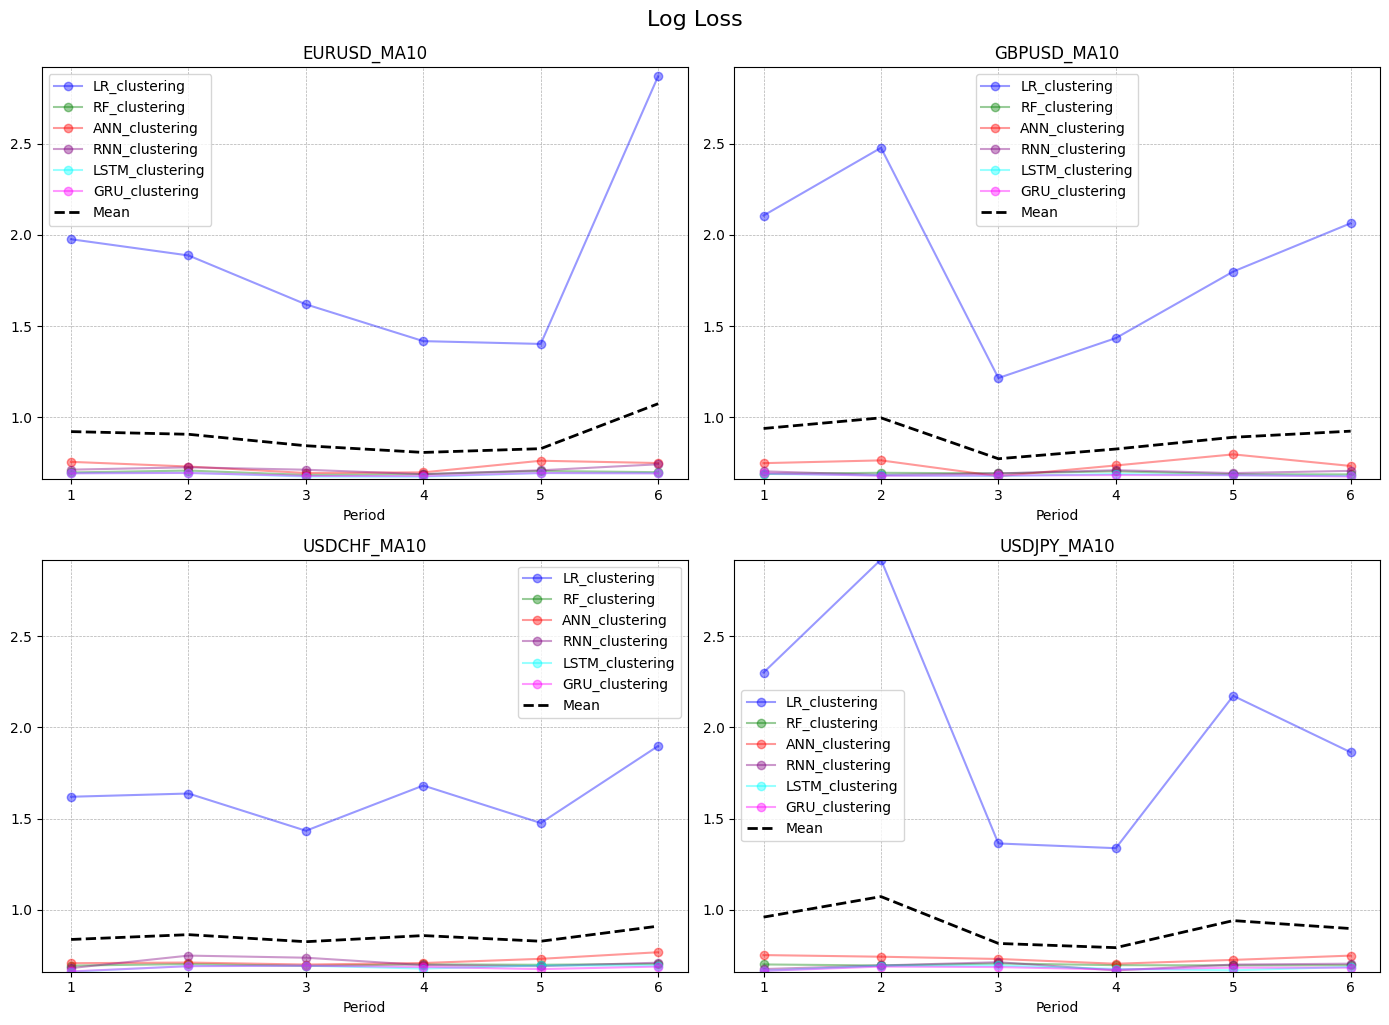

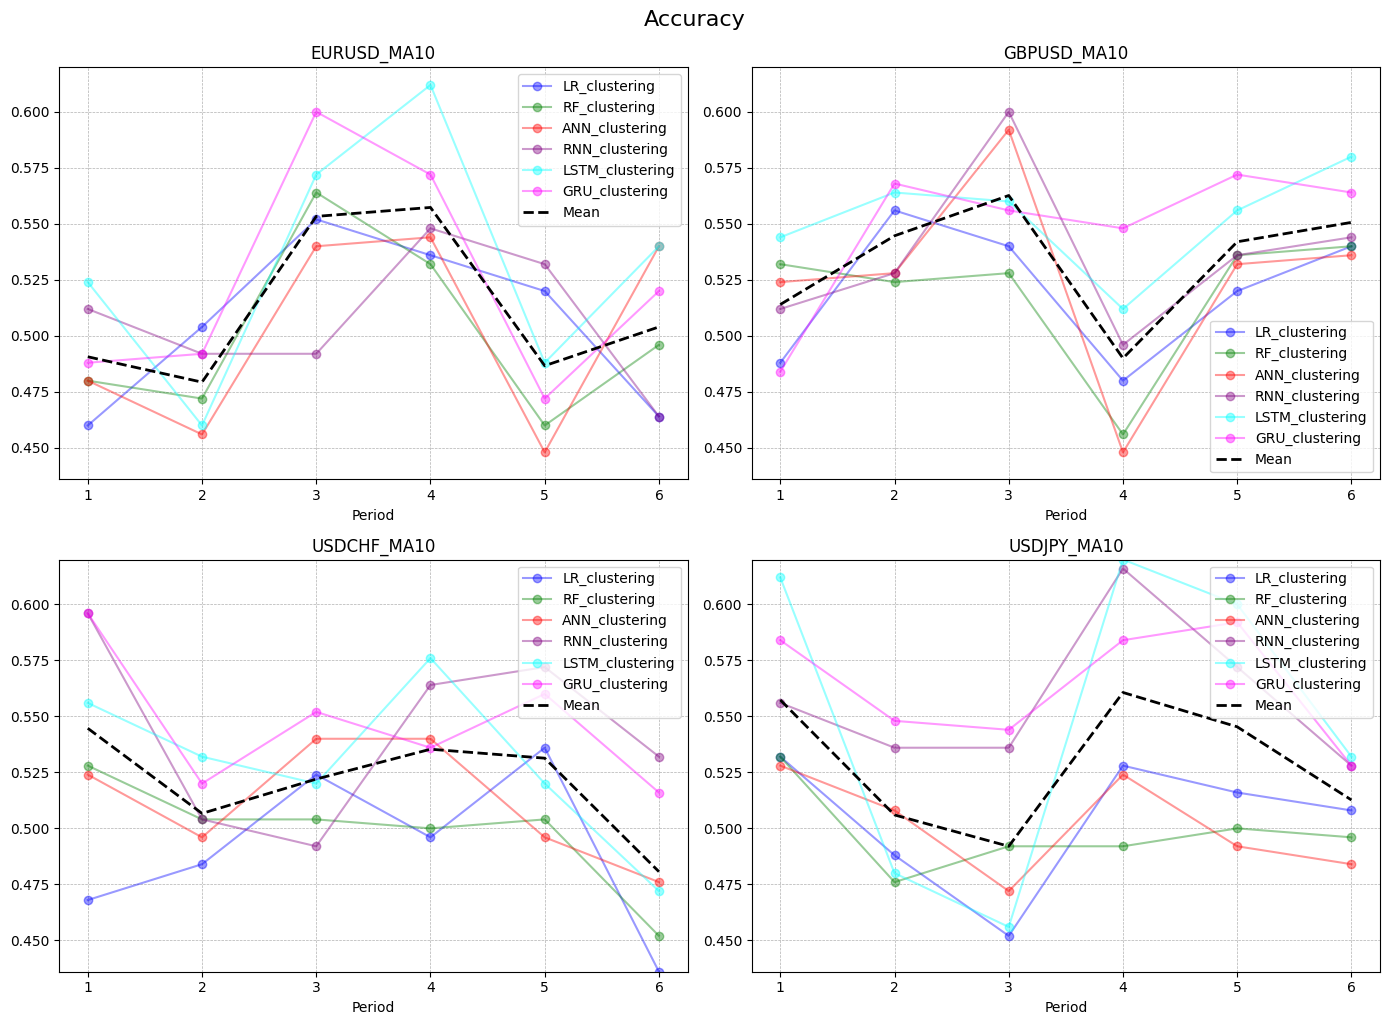

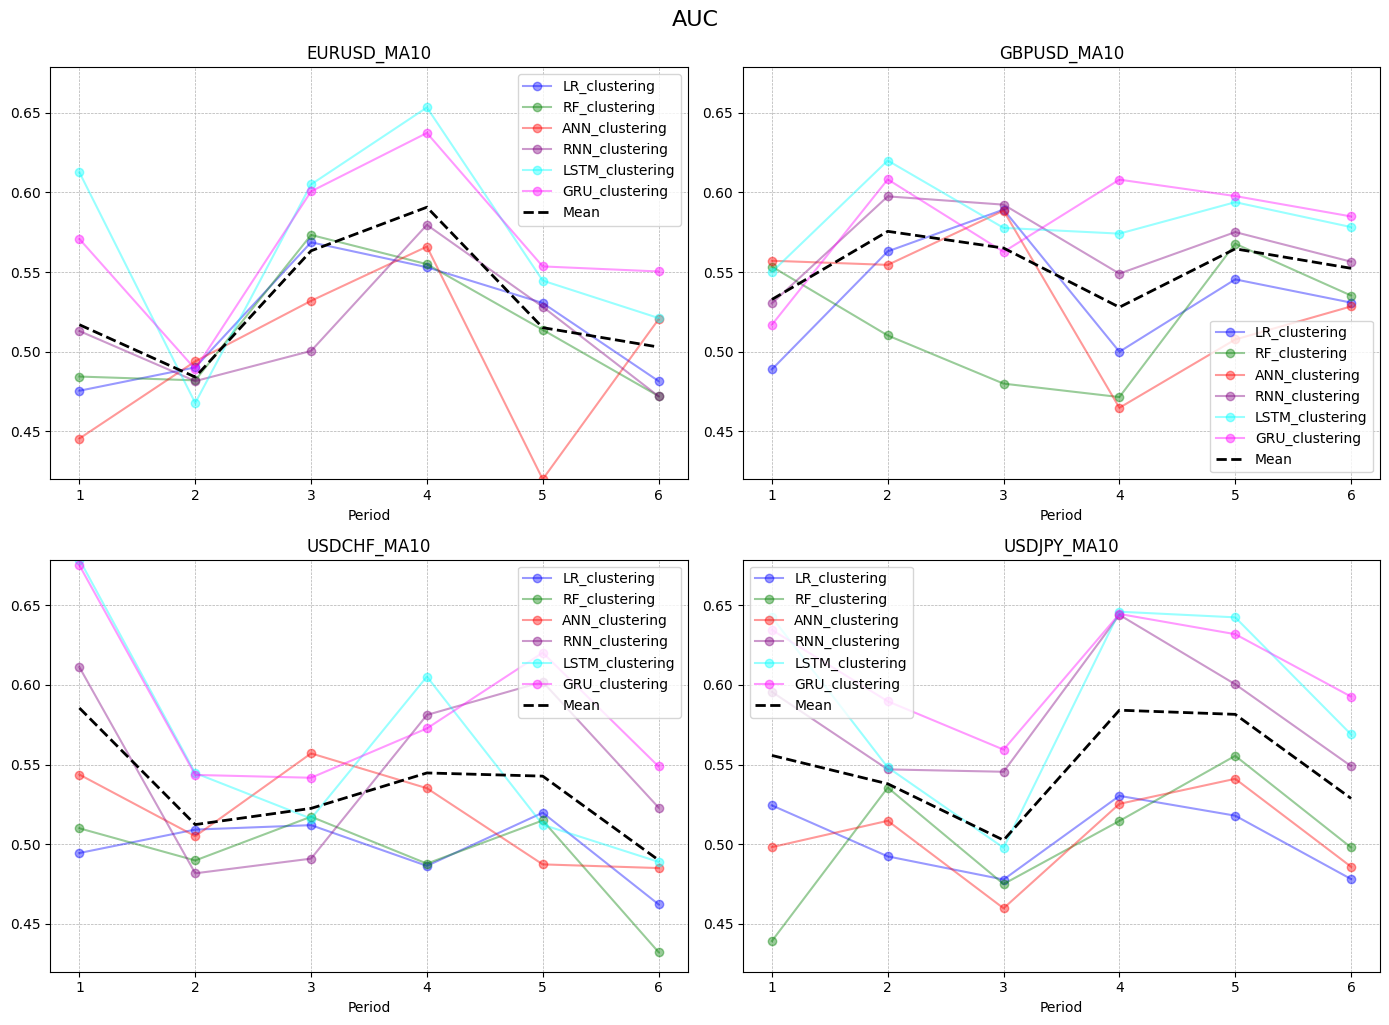

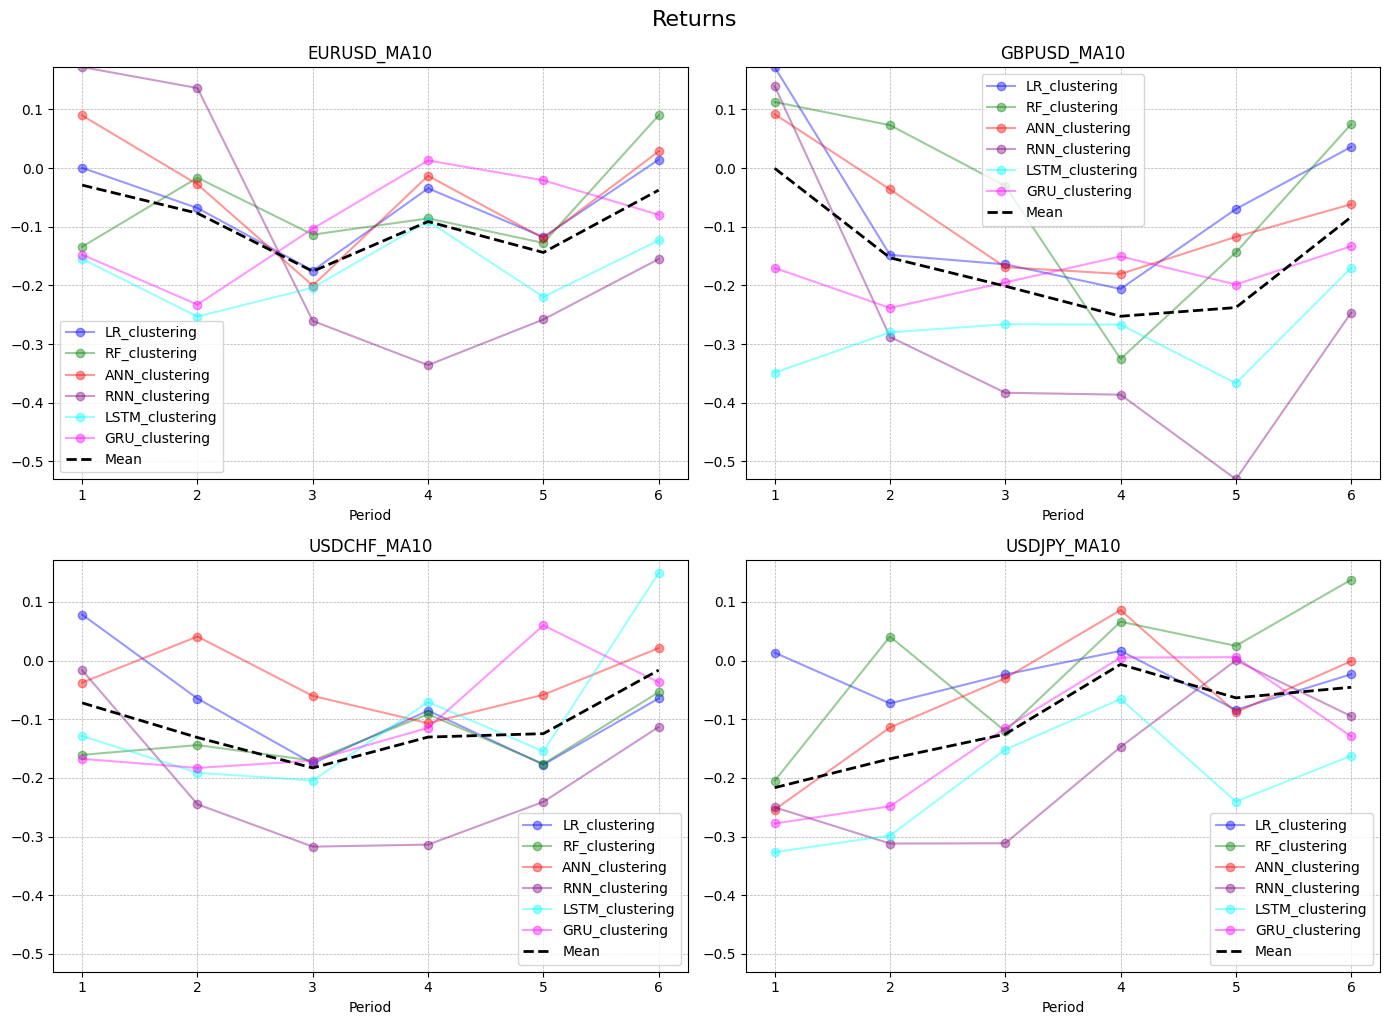

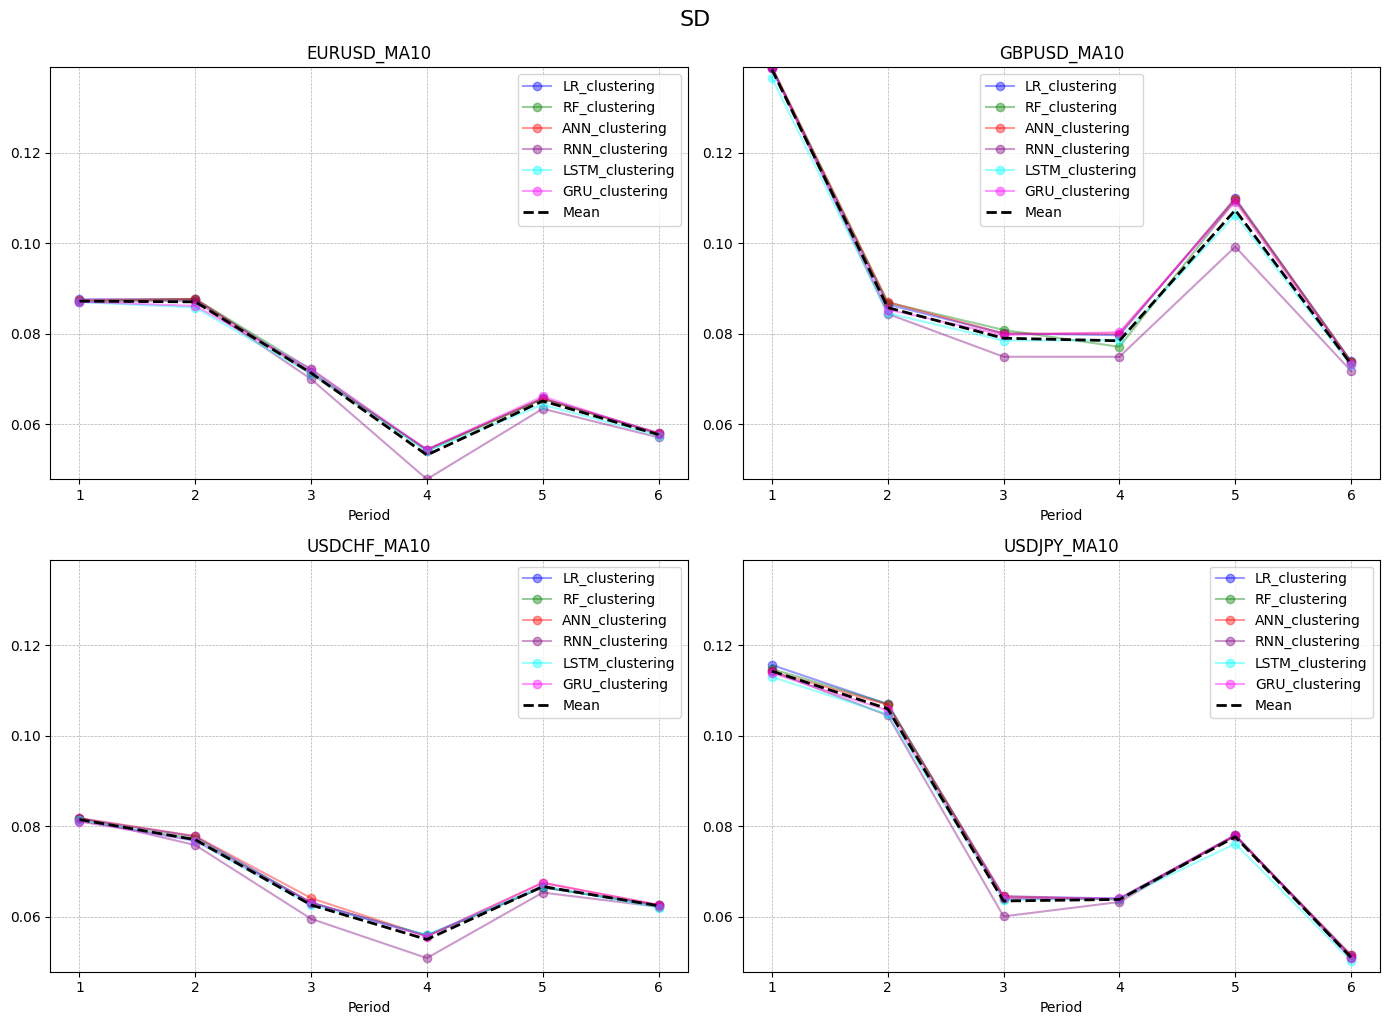

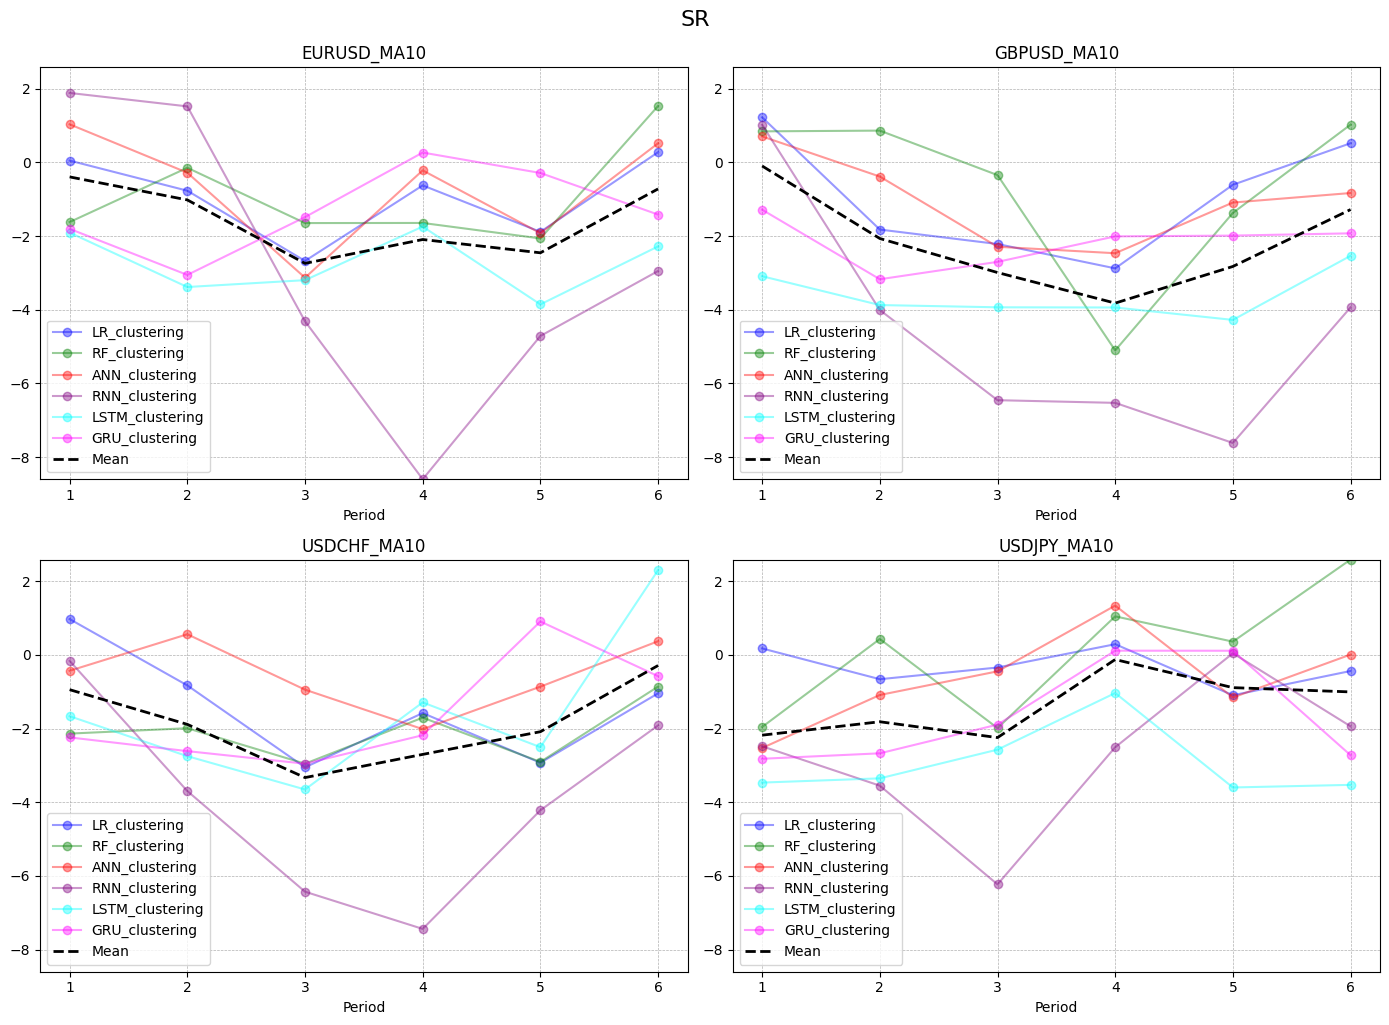

In [16]:
selected_models = ["LR_clustering", "RF_clustering", "ANN_clustering", "RNN_clustering", "LSTM_clustering", "GRU_clustering"]
currency_files = ["EURUSD_MA10.csv", "GBPUSD_MA10.csv", "USDCHF_MA10.csv", "USDJPY_MA10.csv"]

# Load the data
model_data = {}
for model in selected_models:
    model_data[model] = {}
    for currency_file in currency_files:
        file_path = os.path.join(REPORTS_DIR, model, currency_file)
        if os.path.exists(file_path):
            model_data[model][currency_file.replace(".csv", "")] = pd.read_csv(file_path)

for metric in metrics:
    plot_metrics_with_all_models_highlighted_mean_updated(model_data, metric)
